In [1]:
import psycopg2
from config import config
import numpy as np
import pandas as pd

/home/radek/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
params = config()
conn = psycopg2.connect(**params)
cur = conn.cursor()

In [3]:
data = pd.read_sql('SELECT * FROM btcusdt_4h', conn)

In [4]:
data = data.sort_values('open_time')
data.head()

,id,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote,no_trades,...,ema200,short_gmma,long_gmma,d_gmmas,senkou_a,senkou_b,d_senkou,macd,rsi,local_cloud
0,1,2018-01-16 01:00:00,13500.00,13542.93,12501.00,12828.99,7118.016627,2018-01-16 04:59:00,9.227156e+07,45878,...,15074.279851,305.783353,352.526851,680.560855,13923.0825,14288.12,365.0375,1.013025,38.523514,0.435541
1,2,2018-01-16 05:00:00,12829.98,13169.00,12222.00,12347.32,3386.526008,2018-01-16 08:59:00,4.342618e+07,24918,...,15047.145922,601.354910,386.017341,772.159975,13906.0325,14288.12,382.0875,1.292037,34.277367,0.433190
2,3,2018-01-16 09:00:00,12340.00,12488.00,10620.88,12127.16,17380.261099,2018-01-16 12:59:00,2.020536e+08,105071,...,15018.091336,775.642784,422.488922,872.053346,13836.2825,14288.12,451.8375,1.450412,32.513345,0.431314
3,4,2018-01-16 13:00:00,12140.00,12200.00,11000.00,11964.02,8099.861147,2018-01-16 16:59:00,9.436328e+07,60067,...,14987.702566,864.593555,459.771481,976.027144,13241.2225,13898.56,657.3375,1.506521,31.230760,0.431881
4,5,2018-01-16 17:00:00,11963.90,11988.47,10575.35,11064.52,8288.472559,2018-01-16 20:59:00,9.249084e+07,61725,...,14948.665924,1186.784921,521.073106,1131.325214,13241.2225,13898.56,657.3375,1.628699,25.303761,0.431612


In [5]:
data.drop(labels=['id', 'close_time', 'ignore_val', 'taker_quote'], inplace=True, axis=1)

In [6]:
import time
from datetime import datetime, timezone

def to_timestamp(dt):
    timestamp = dt.replace(tzinfo=timezone.utc).timestamp()
    return timestamp

def time_from_ts(timestamp, timespec='minutes'):
    st = datetime.fromtimestamp(timestamp / 1000)
    time_transformed = str(st.isoformat(timespec=timespec, sep=' '))
    return time_transformed

In [7]:
# data.open_time = data.open_time.apply(to_timestamp)

In [8]:
data['mid_price'] = (data.high_price + data.low_price) / 2

In [9]:
data.head()

,open_time,open_price,high_price,low_price,close_price,volume,quote,no_trades,taker_base,ema12,...,short_gmma,long_gmma,d_gmmas,senkou_a,senkou_b,d_senkou,macd,rsi,local_cloud,mid_price
0,2018-01-16 01:00:00,13500.00,13542.93,12501.00,12828.99,7118.016627,9.227156e+07,45878,3491.770205,13501.480081,...,305.783353,352.526851,680.560855,13923.0825,14288.12,365.0375,1.013025,38.523514,0.435541,13021.965
1,2018-01-16 05:00:00,12829.98,13169.00,12222.00,12347.32,3386.526008,4.342618e+07,24918,1445.938182,13323.916992,...,601.354910,386.017341,772.159975,13906.0325,14288.12,382.0875,1.292037,34.277367,0.433190,12695.500
2,2018-01-16 09:00:00,12340.00,12488.00,10620.88,12127.16,17380.261099,2.020536e+08,105071,8545.249836,13139.800532,...,775.642784,422.488922,872.053346,13836.2825,14288.12,451.8375,1.450412,32.513345,0.431314,11554.440
3,2018-01-16 13:00:00,12140.00,12200.00,11000.00,11964.02,8099.861147,9.436328e+07,60067,4124.198874,12958.911219,...,864.593555,459.771481,976.027144,13241.2225,13898.56,657.3375,1.506521,31.230760,0.431881,11600.000
4,2018-01-16 17:00:00,11963.90,11988.47,10575.35,11064.52,8288.472559,9.249084e+07,61725,4054.583685,12667.466416,...,1186.784921,521.073106,1131.325214,13241.2225,13898.56,657.3375,1.628699,25.303761,0.431612,11281.910


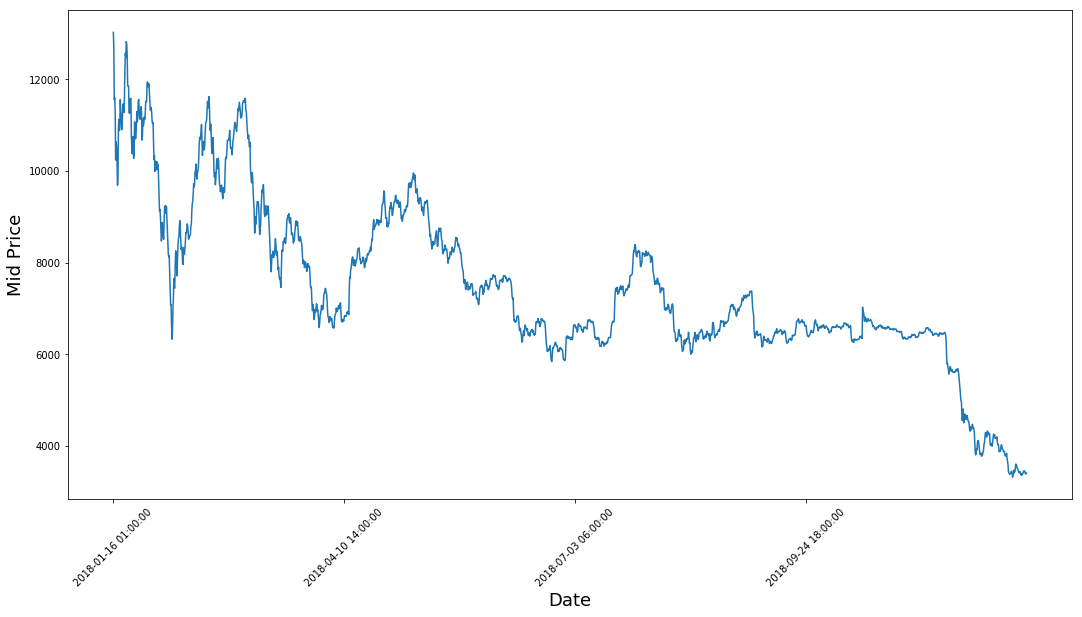

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),data['mid_price'])
plt.xticks(range(0,data.shape[0],500),data['open_time'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

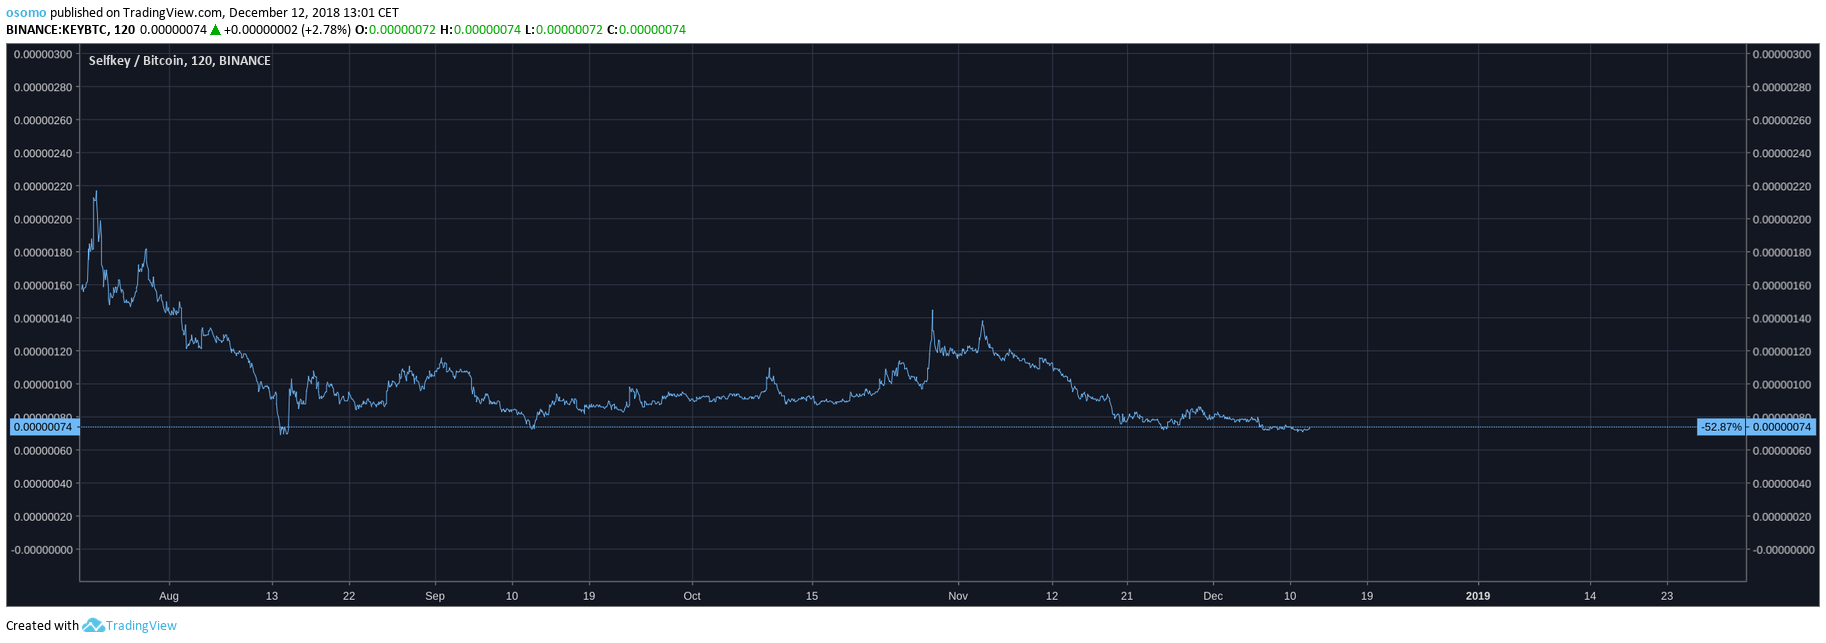

In [11]:
# Just to confirm, a screenshot from tradingview to confirm the data is correct.
# The dataf
from IPython.core.display import Image, display
display(Image('keybtc_1h.png', width=1200, unconfined=True))

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
data.columns

Index(['open_time', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'quote', 'no_trades', 'taker_base', 'ema12', 'ema26', 'ema50',
       'ema200', 'short_gmma', 'long_gmma', 'd_gmmas', 'senkou_a', 'senkou_b',
       'd_senkou', 'macd', 'rsi', 'local_cloud', 'mid_price'],
      dtype='object')

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
mid_prices = data['mid_price']

In [40]:
data.shape

(1979, 23)

In [17]:
train_len = int(data.shape[0] * 0.8)
train_data = mid_prices[:train_len].values
test_data = mid_prices[train_len:].values

In [44]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [45]:
train_data.shape

(1583, 1)

In [46]:
train_data

array([[0.1       ],
       [0.18512336],
       [0.24468954],
       ...,
       [0.56821364],
       [0.57097877],
       [0.58137734]])

In [41]:
test_data.shape

(396,)

In [47]:
# Because different time periods have different value ranges, I divide the data into smaller periods.
# In this case one window will be approximately 1/4 of the whole data length.

# Rounding the window size (to 100's) I will scale the data to.
round_size = int(train_data.shape[0]/100)*100
print(round_size)

smoothing_window_size = int(round_size / 4)
print(smoothing_window_size)

for di in range(0, round_size, smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# Normalizing the remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

1500
375


In [22]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)


In [23]:
# Smoothing up with Exponential Moving Average - the price curve will be smoother.
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

## SMA
What is Simple Moving Average - SMA
A simple moving average (SMA )is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. A simple, or arithmetic, moving average that is calculated by adding the closing price of the security for a number of time periods and then dividing this total by that same number of periods. Short-term averages respond quickly to changes in the price of the underlying, while long-term averages are slow to react.

Source: https://www.investopedia.com/terms/s/sma.asp

In [91]:
window_size = 100
N = train_data.size
sma_predictions = []
sma_errors = []

for pred_idx in range(window_size,N):
    date = data.loc[pred_idx,'open_time']
    sma_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    # Comparing the prediction (mean value of last n-'window-sized' elements) to actual value
    sma_errors.append((sma_predictions[-1]-train_data[pred_idx])**2)

print(f'MSE error for SMA: {0.5*np.mean(sma_errors):.5f}')

MSE error for SMA: 0.03851


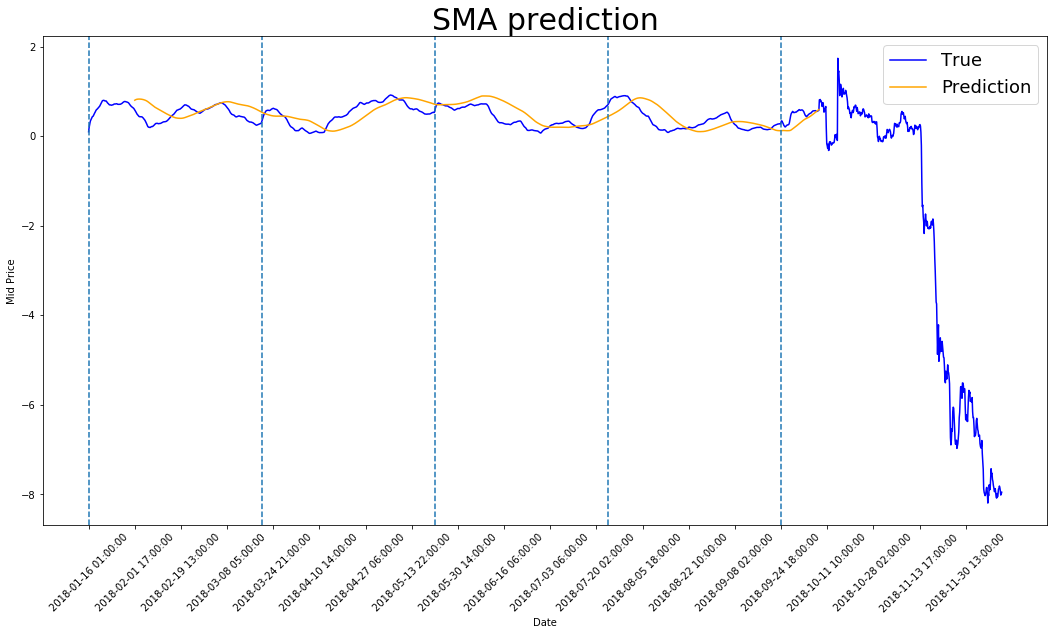

In [93]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),sma_predictions,color='orange',label='Prediction')
plt.xticks(range(0,data.shape[0],100),data['open_time'].loc[::100],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title('SMA prediction', fontsize=30)
# Vlines showing the borders of scaling windows.
for di in range(0, round_size+smoothing_window_size, smoothing_window_size):
    plt.axvline(di, linestyle='--')
plt.show()

## EMA
What is Exponential Moving Average - EMA
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

Source: https://www.investopedia.com/terms/e/ema.asp

In [89]:
ema_predictions = []
ema_errors = []
running_mean = std_avg_predictions[0]
multiplier = 2 / (window_size + 1)

ema_predictions.append(running_mean)
for pred_idx in range(window_size+1,N):
    running_mean = running_mean + multiplier*(train_data[pred_idx-1] - running_mean)
    ema_predictions.append(running_mean)
    ema_errors.append((ema_predictions[-1]-train_data[pred_idx])**2)

print(f'MSE error for EMA averaging: {0.5*np.mean(ema_errors):.5f}')

MSE error for EMA averaging: 0.00207


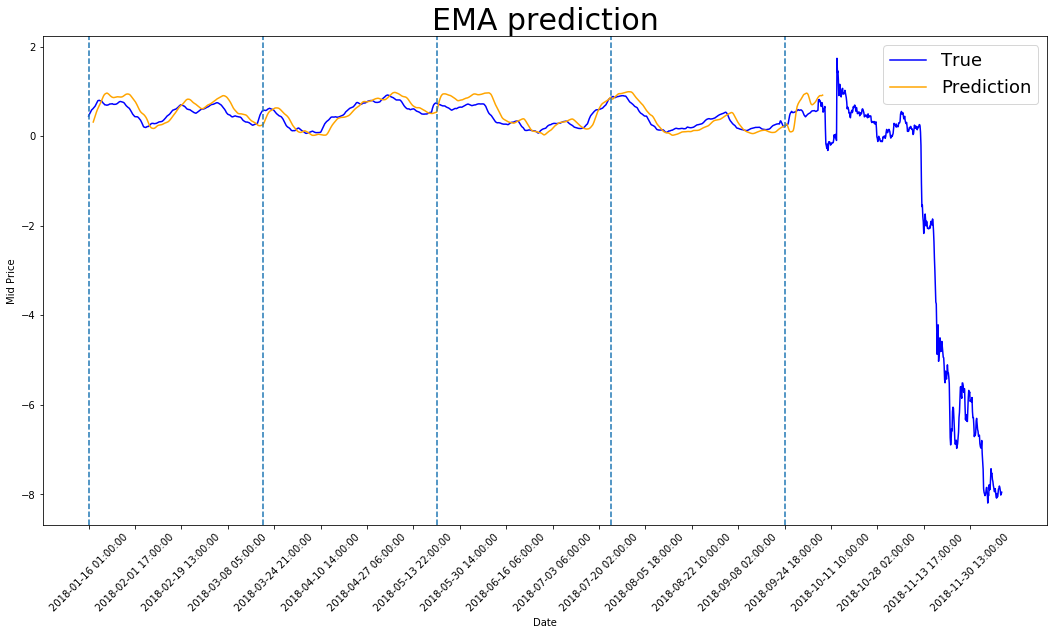

In [90]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]-window_size),all_mid_data,color='b',label='True')
plt.plot(range(windows,N),run_avg_predictions,color='orange', label='Prediction')
plt.xticks(range(0,data.shape[0],100),data['open_time'].loc[::100],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title('EMA prediction', fontsize=30)
for di in range(0, round_size+smoothing_window_size, smoothing_window_size):
    plt.axvline(di, linestyle='--')
plt.show()

In [28]:
class DataGeneratorSeq(object):
    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

        
    def next_batch(self):
        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
        return batch_data,batch_labels

    
    def unroll_batches(self):
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            data, labels = self.next_batch()    
            unroll_data.append(data)
            unroll_labels.append(labels)
        return unroll_data, unroll_labels

    
    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))

In [29]:
dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.1        0.4697576  0.755008   0.2016438  0.11413138]

	Output: [0.24468954 0.44894588 0.7549921  0.18536867 0.11646305]


Unrolled index 1
	Inputs:  [0.18512335 0.4609056  0.7558402  0.19534115 0.11674956]

	Output: [0.24468954 0.43958187 0.7568431  0.19534115 0.11646305]


Unrolled index 2
	Inputs:  [0.24468954 0.44894588 0.7551624  0.18536867 0.11646305]

	Output: [0.24468954 0.44894588 0.763014   0.1531625  0.11646305]


Unrolled index 3
	Inputs:  [0.29897967 0.43958187 0.7549921  0.16981961 0.11893249]

	Output: [0.34308922 0.4328039  0.7600827  0.1531625  0.12466078]


Unrolled index 4
	Inputs:  [0.34308922 0.4328039  0.7568431  0.1531625  0.12466078]

	Output: [0.434031   0.44354007 0.7649165  0.1531625  0.13480604]
